In [4]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

In [5]:
red = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\wine\wine.csv')
white = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\wine\winewhite.csv')

In [3]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol   quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5

In [4]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.875547             46.468418     0.996747   
std       0.047065            10.460434             32.895920     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates     alcohol       quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#####  1: T Test: Looking at the EDA, I'd like to explore citric acid and quality scores a little more

In [76]:
df = pd.DataFrame(red, columns=['citric acid', 'quality'])


In [77]:
df.head(15)

citric acid  quality
0          0.00        5
1          0.00        5
2          0.04        5
3          0.56        6
4          0.00        5
5          0.00        5
6          0.06        5
7          0.00        7
8          0.02        7
9          0.36        5
10         0.08        5
11         0.36        5
12         0.00        5
13         0.29        5
14         0.18        5

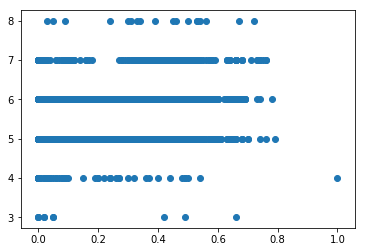

In [78]:
import matplotlib.pyplot as plt

plt.scatter(df['citric acid'], df['quality'])
plt.show()

In [44]:
ca = red['citric acid']

##### Shapiro-Wilk test to evaluate if data is normal (ie Drawn from a Gaussian Distribution). Wilks is good for small datasets, H0: sample x1, x2...xn came from a normally distributed population. It is best to run several normality tests.

##### H0 is data is normally distrubuted

In [79]:
stat, p = shapiro(df)
print('Statistics = %.3f, p=%3f' % (stat, p))

Statistics = 0.774, p=0.000000


In [35]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussain (fail to reject H0)')
else:
    print("Sample does not look Gaussain (reject H0)")

Sample does not look Gaussain (reject H0)


##### According to Shapiro Wilks, data is not normally distrubuted and cannot proceed with t-test. Let's try another hypothesis test, D’Agostino’s K^2 Test

In [80]:
stat, p = normaltest(ca)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=152.039, p=0.000


In [81]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


**Anderson-Darling Test.**

**Weighted tails. The A-D Statistic is what is calculated and falls into a pre-determined range to calculate p-value for each distribution**

In [82]:
result = anderson(ca)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 17.542
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


##### Continue with nonparametric tests 

##### Mann Whitney. Ho is two mean samples are 

In [84]:
import scipy.stats as stats

u_statistic, pVal = stats.mannwhitneyu(red['citric acid'], red['quality'])

print ('P value: %.3f' % pVal)
print ('Statistic: %.3f' %u_statistic)


P value: 0.000
Statistic: 0.000
